In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [23]:
consumer_key = "xxxxxxxxxxxxxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxxxxxxxxxx""
access_token_key = "xxxxxxxxxxxxxxxxxxxxxx"
access_token_secret = "xxxxxxxxxxxxxxxxxxxxxx""

In [24]:
# authenticate Tweepy
authentication = tw.OAuthHandler(consumer_key, consumer_secret)
authentication.set_access_token(access_token_key, access_token_secret)
api = tw.API(authentication)

In [25]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [47]:
# Create a custom search term and define the number of tweets
search_term = "#COVID19vaccine"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en").items(10000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


In [48]:
tweets_no_urls

['Russia approves a Vector Institute vaccine for early use before Phase 3 testing Oct 14 A vaccine by the R',
 'RT BusyDrT Biden urges state local leaders to mandate COVID19vaccine',
 'Out via NEJM Trustworthiness before Trust Covid19Vaccine Trials and the Black Community',
 'So let me be clear assuming positive data Pfizer will apply for Emergency Authorization Use in the US soon aft',
 'RT PittTweet In honor of this mornings COVID19Vaccine panel heres a TBT to the 1950s and Jonas Salks incredible work developing a p',
 'Read our new article in PharmaCommerce which identifies many of the challenges COVID19 preparedness teams have so',
 'RT MarchOfDimesNY In case you missed it please join MarchofDimes PittTweet amp salkfoundationfor a WilsonMHI amazing expert panel d',
 'RT BusyDrT Biden urges state local leaders to mandate COVID19vaccine',
 'ICYMI GovParsonMO announced the state of Missouri has submitted to federal officials a plan for how it will admi',
 'UAEs Minister of Foreign Aff

In [50]:
df = pd.DataFrame(tweets_no_urls,columns=['tweets'])

In [51]:
df.head()

,tweets
0,Russia approves a Vector Institute vaccine for...
1,RT BusyDrT Biden urges state local leaders to ...
2,Out via NEJM Trustworthiness before Trust Covi...
3,So let me be clear assuming positive data Pfiz...
4,RT PittTweet In honor of this mornings COVID19...


In [52]:
df.to_csv('tweet.csv')

In [53]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
sentiment_objects[0].polarity, sentiment_objects[0]
(0.35,
TextBlob(""))


(0.35, TextBlob(""))

In [54]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.35,
 '']


[0.35, '']

In [55]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()


,polarity,tweet
0,0.100000,Russia approves a Vector Institute vaccine for...
1,0.000000,RT BusyDrT Biden urges state local leaders to ...
2,-0.166667,Out via NEJM Trustworthiness before Trust Covi...
3,0.163636,So let me be clear assuming positive data Pfiz...
4,0.900000,RT PittTweet In honor of this mornings COVID19...


In [37]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

In [56]:
sentiment_df.head()

,polarity,tweet
0,0.100000,Russia approves a Vector Institute vaccine for...
1,0.000000,RT BusyDrT Biden urges state local leaders to ...
2,-0.166667,Out via NEJM Trustworthiness before Trust Covi...
3,0.163636,So let me be clear assuming positive data Pfiz...
4,0.900000,RT PittTweet In honor of this mornings COVID19...


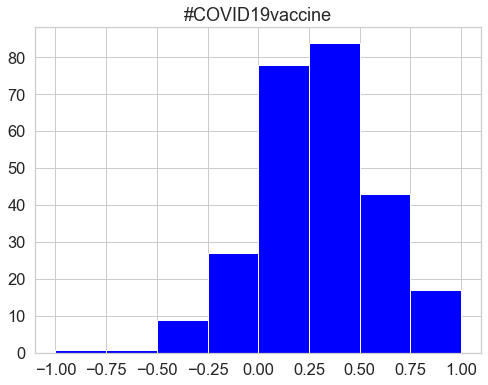

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("#COVID19vaccine")
plt.show()
